In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../../"))

# our library
from src.mcmc_sat import mcmc, models, utils

In [2]:
# experiment setup
bound = 42
reduction_factor = 1
num_bits = 10
max_int_bv = 2**8-1

In [3]:
(g, num_bits, num_vars) = models.get_books_sat(bound=bound, y_reduction_factor=reduction_factor, num_bits=num_bits, max_int_bv=max_int_bv)

In [4]:
trace = mcmc.sample_mh_trace_from_z3_model(backend='cmsgen',
                                           z3_problem=g,
                                           num_vars=num_vars,
                                           num_bits=num_bits,
                                           num_samples=10000, 
                                           num_chains=4)

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 10000 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing sam

/home/pardo/programs/miniconda3/envs/mcmc_sat/lib/python3.12/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (72), generating only 20 plots
  warnings.warn(


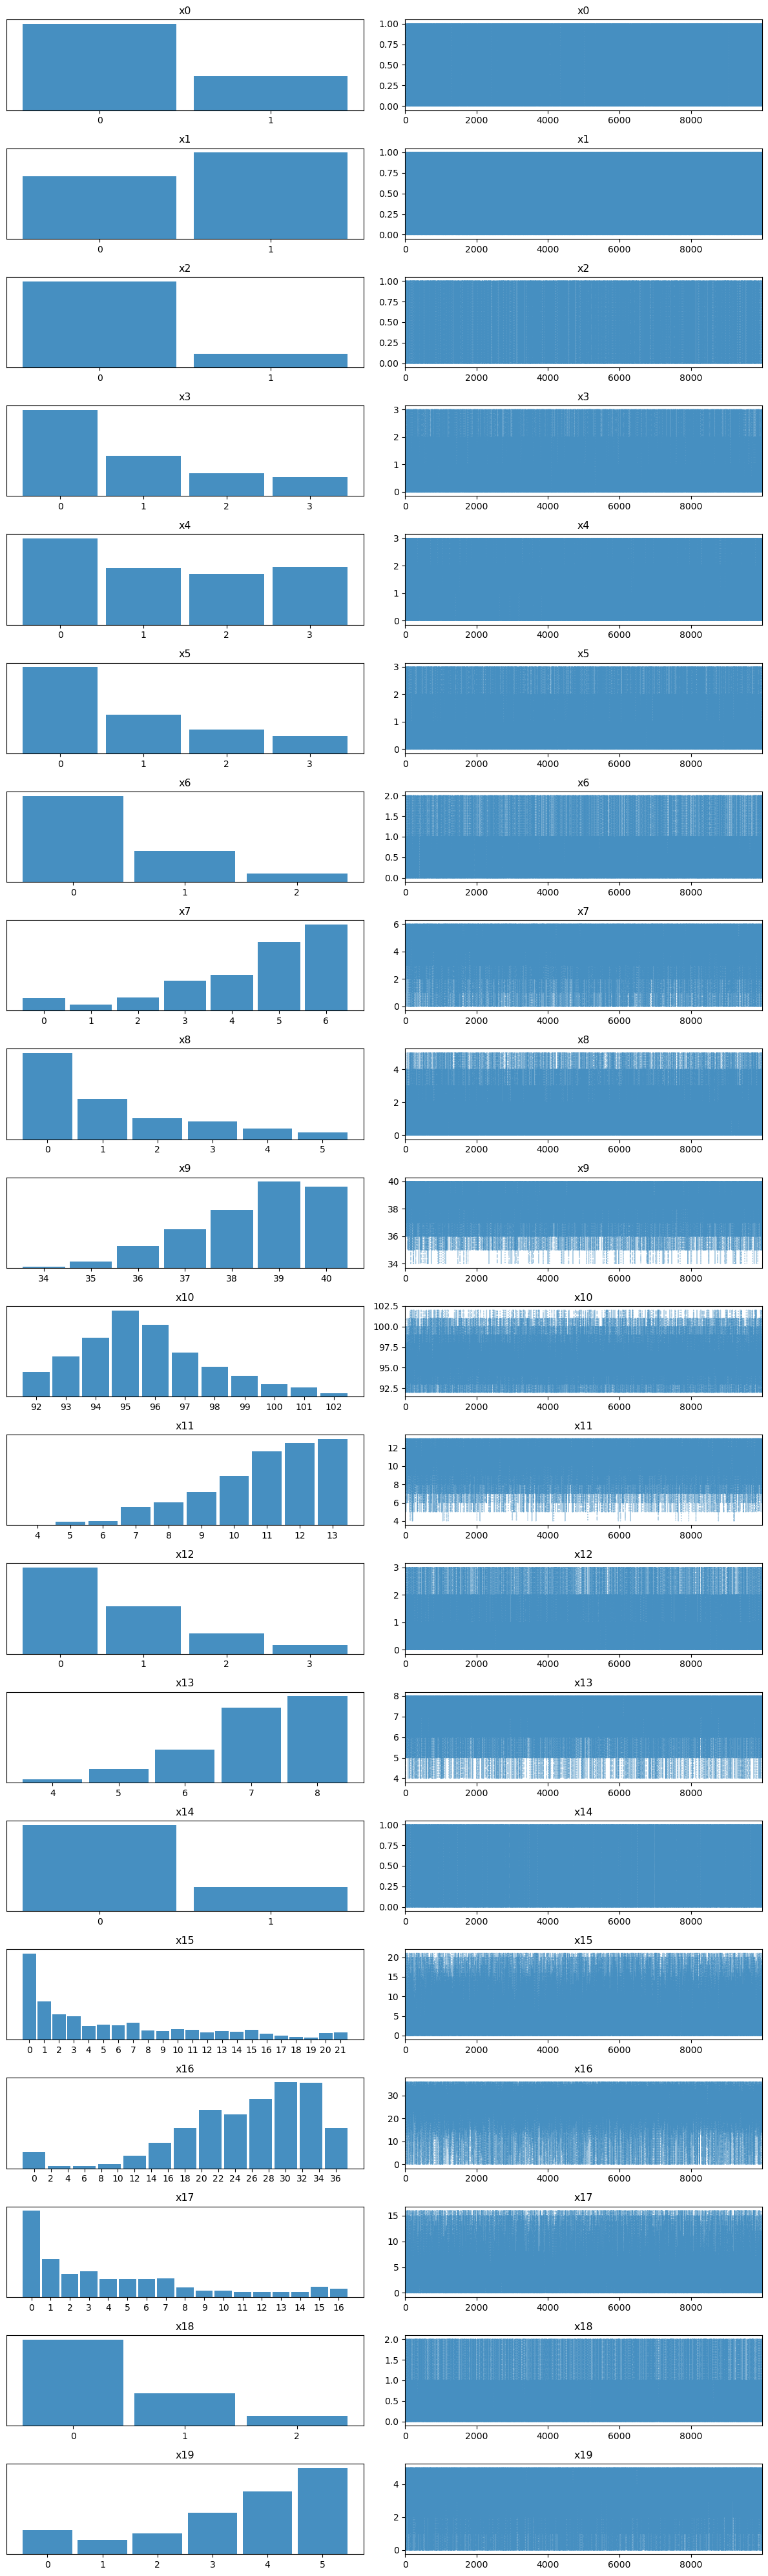

In [5]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('cmsgen_trace_plot.png', dpi=150);

In [6]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,0.283,0.451,0.0,1.0,0.002,0.002,39974.0,39974.0,1.0
x1,0.580,0.494,0.0,1.0,0.002,0.002,39994.0,39994.0,1.0
x2,0.136,0.343,0.0,1.0,0.002,0.001,40418.0,40000.0,1.0
x3,0.846,1.036,0.0,3.0,0.005,0.004,38433.0,38840.0,1.0
x4,1.320,1.168,0.0,3.0,0.006,0.004,39169.0,39073.0,1.0
...,...,...,...,...,...,...,...,...,...
x67,0.564,0.496,0.0,1.0,0.002,0.002,39717.0,39717.0,1.0
x68,0.267,0.443,0.0,1.0,0.002,0.002,39315.0,39315.0,1.0
x69,18.687,4.379,10.0,23.0,0.022,0.015,40301.0,38853.0,1.0
x70,105.060,5.350,98.0,115.0,0.026,0.019,41056.0,39902.0,1.0


In [7]:
utils.save_trace(trace, f'roads_spur_case_{bound}_rf_{reduction_factor}_bits_{num_bits}_max_int_{max_int_bv}.nc')